# Visualizing Stock Data

In this activity, you'll convert a date column to `datetime` and perform slicing functions on various dates.

Instructions

In this activity, you’ll use the Tesla stock data that you used in the previous activity. The first part of the starter Jupyter notebook recalls the data preparation and time zone setting. Review the initial section, and then continue with the following steps:

1. Set the “time” column as the DataFrame index.

2. Plot the closing prices of the TSLA stock.

3. Using the `loc` function, zoom in to 2020 to inspect the TSLA closing prices.

4. Using the `loc` function, plot the closing prices from August and September 2020.

5. Using the `loc` function, plot the closing prices from August 22 and September 5, 2020.



References

[Pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[Pandas DataTimeIndex](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

[Pandas loc function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)


In [18]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path

## Data Preparation

This section summarizes the steps completed in the "Inspecting Time Zones in Stock Data" activity. 

In [19]:
# Read the data from the tsla_historical.csv file into a Pandas DataFrame
df_tsla = pd.read_csv(
    Path("../Resources/tsla_historical.csv")
)

In [20]:
# Display the first five rows of the DataFrame
df_tsla.head()

,time,close
0,2018-01-02 09:30:00-05:00,315.870
1,2018-01-02 09:45:00-05:00,317.500
2,2018-01-02 10:00:00-05:00,318.035
3,2018-01-02 10:15:00-05:00,317.470
4,2018-01-02 10:30:00-05:00,316.875


In [21]:
# Inspect the DataFrame's data types using the info function
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21279 entries, 0 to 21278
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    21279 non-null  object 
 1   close   21279 non-null  float64
dtypes: float64(1), object(1)
memory usage: 332.6+ KB


In [22]:
# Transform the time column to a datetime data type
df_tsla["time"] = pd.to_datetime(
    df_tsla["time"],
    infer_datetime_format = True,
    utc = True    
)

In [23]:
# Display the first five rows of the DataFrame to confirm
# changes to the time column
df_tsla.head()

,time,close
0,2018-01-02 14:30:00+00:00,315.870
1,2018-01-02 14:45:00+00:00,317.500
2,2018-01-02 15:00:00+00:00,318.035
3,2018-01-02 15:15:00+00:00,317.470
4,2018-01-02 15:30:00+00:00,316.875


In [24]:
# switch time to US/Eastern
df_tsla['time'] = df_tsla['time'].dt.tz_convert('US/Eastern')

In [25]:
# Use the info function to confirm the change in data type 
# for the time column
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21279 entries, 0 to 21278
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                     
---  ------  --------------  -----                     
 0   time    21279 non-null  datetime64[ns, US/Eastern]
 1   close   21279 non-null  float64                   
dtypes: datetime64[ns, US/Eastern](1), float64(1)
memory usage: 332.6 KB


## Step 1: Set the “time” column as the DataFrame index.

In [26]:
# Set the time column as DataFrame index
df_tsla = df_tsla.set_index('time')

# Display the first five rows of the DataFrame
df_tsla.head()

,close
time,
2018-01-02 09:30:00-05:00,315.870
2018-01-02 09:45:00-05:00,317.500
2018-01-02 10:00:00-05:00,318.035
2018-01-02 10:15:00-05:00,317.470
2018-01-02 10:30:00-05:00,316.875


## Step 2: Plot the closing prices of the TSLA stock.

<Axes: xlabel='time'>

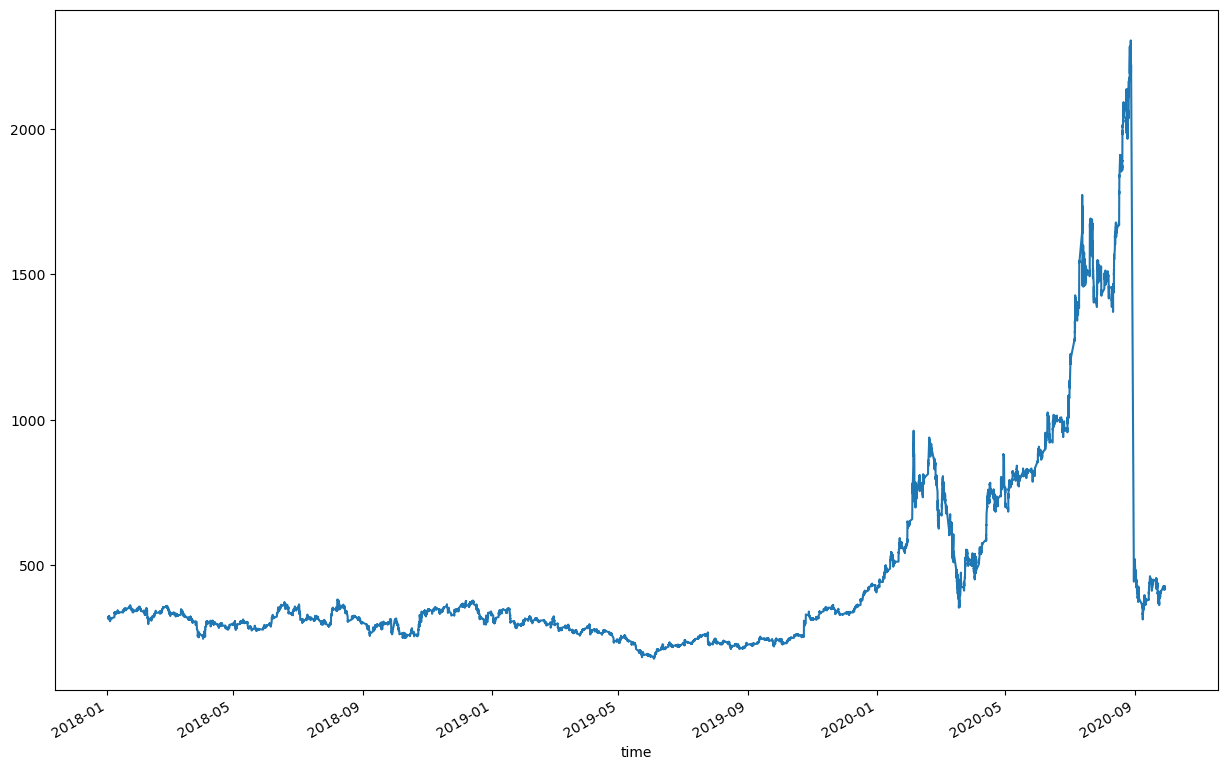

In [27]:
# Plot the closing price of TSLA
df_tsla['close'].plot(figsize=[15,10])

## Step 3: Using the `loc` function, zoom in to 2020 to inspect the TSLA closing prices.

<Axes: xlabel='time'>

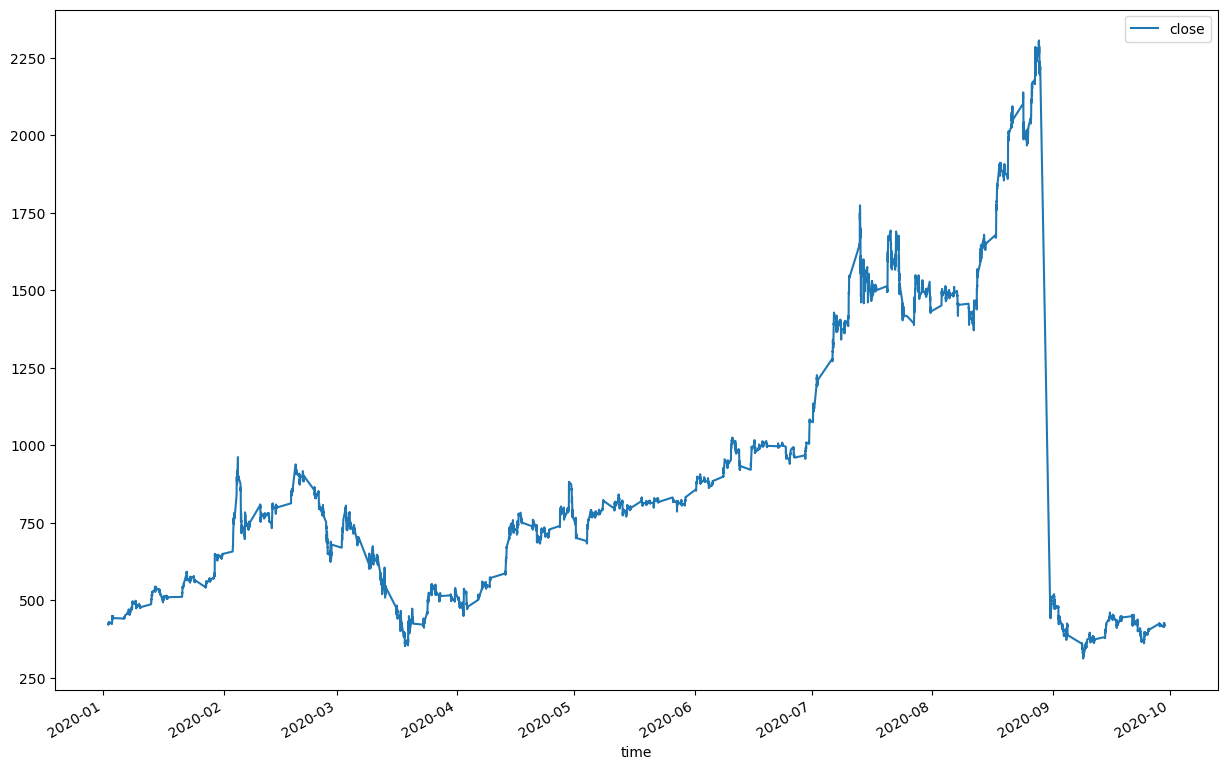

In [28]:
# Select and plot the TSLA closing prices from 2020
df_tsla.loc['2020'].plot(figsize=[15,10])

<Axes: xlabel='time'>

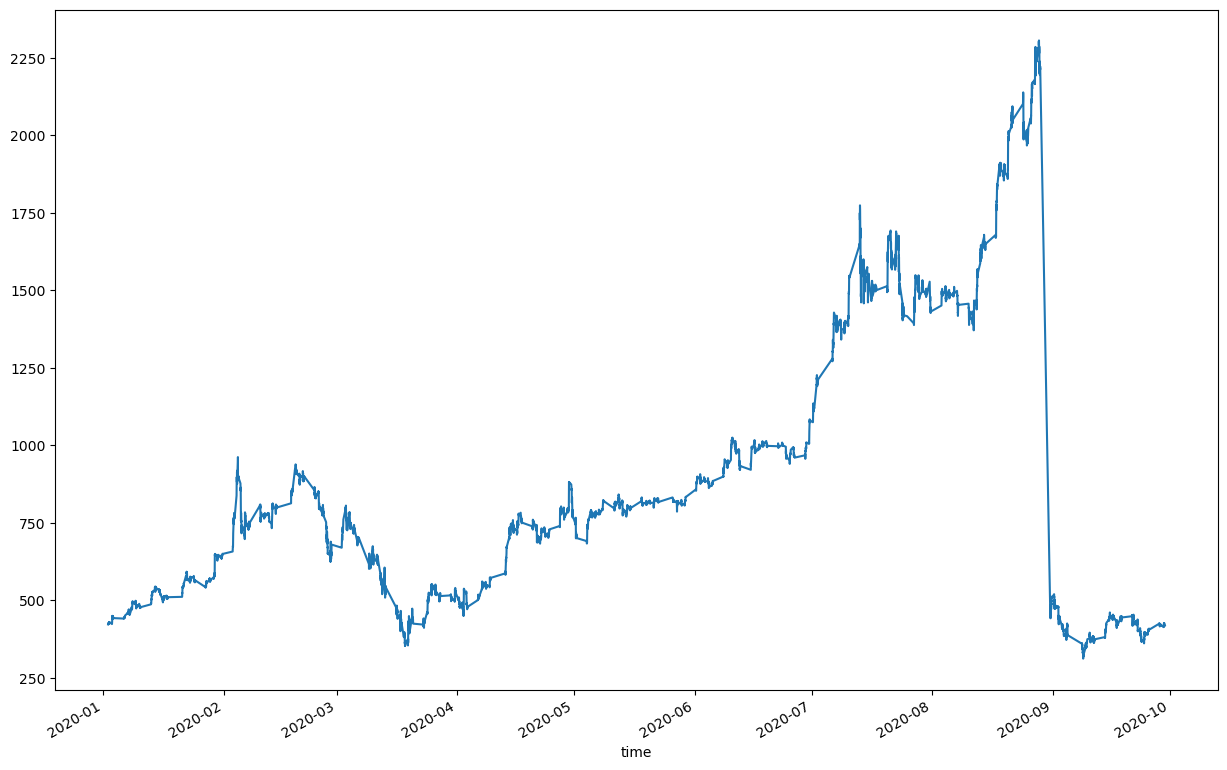

In [29]:
# Select and plot the TSLA closing prices from 2020 using DatetimeIndex attributes
filter_df = df_tsla.index.year==2020
df_tsla[filter_df]['close'].plot(figsize=[15,10])

## Step 4: Using the `loc` function, plot the closing prices from August and September 2020.

<Axes: xlabel='time'>

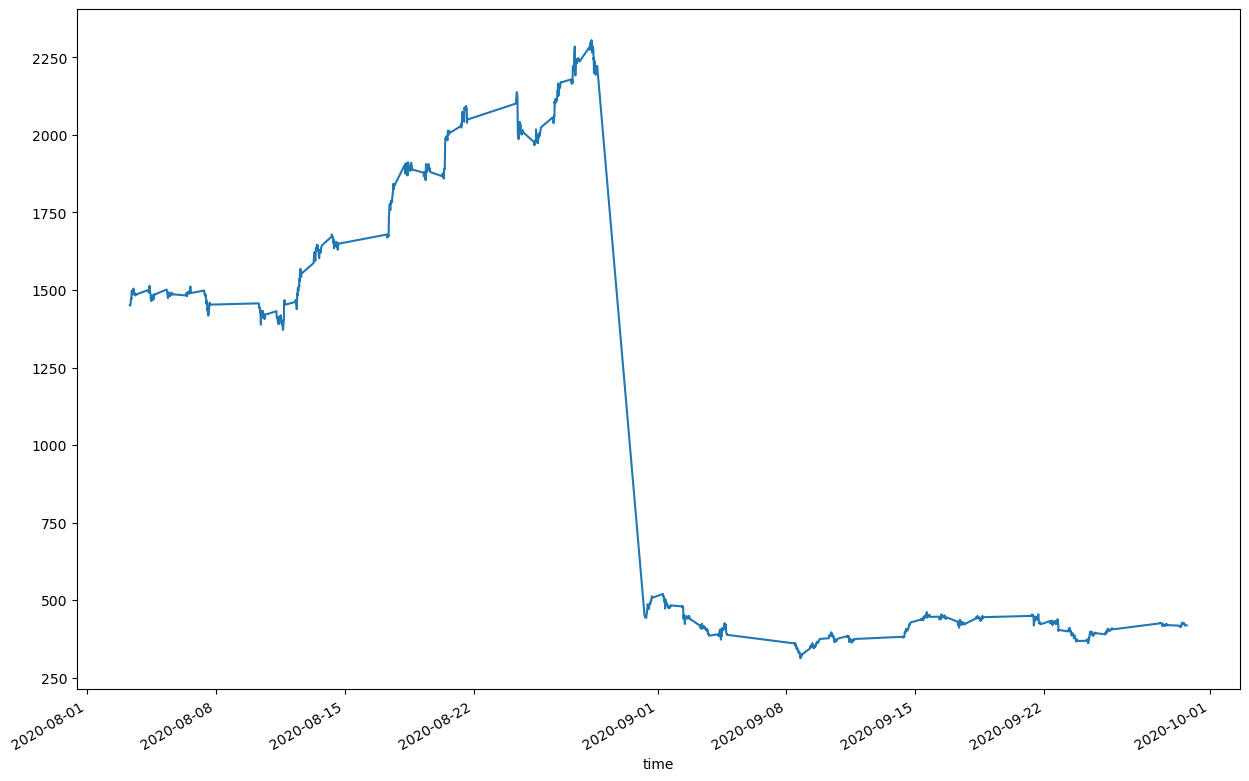

In [30]:
# Select and plot the TSLA closing prices from August and September 2020
df_tsla.loc['2020-08':'2020-09','close'].plot(figsize=[15,10])

## Step 5: Using the `loc` function, plot the closing prices from August 22 and September 5, 2020.

<Axes: xlabel='time'>

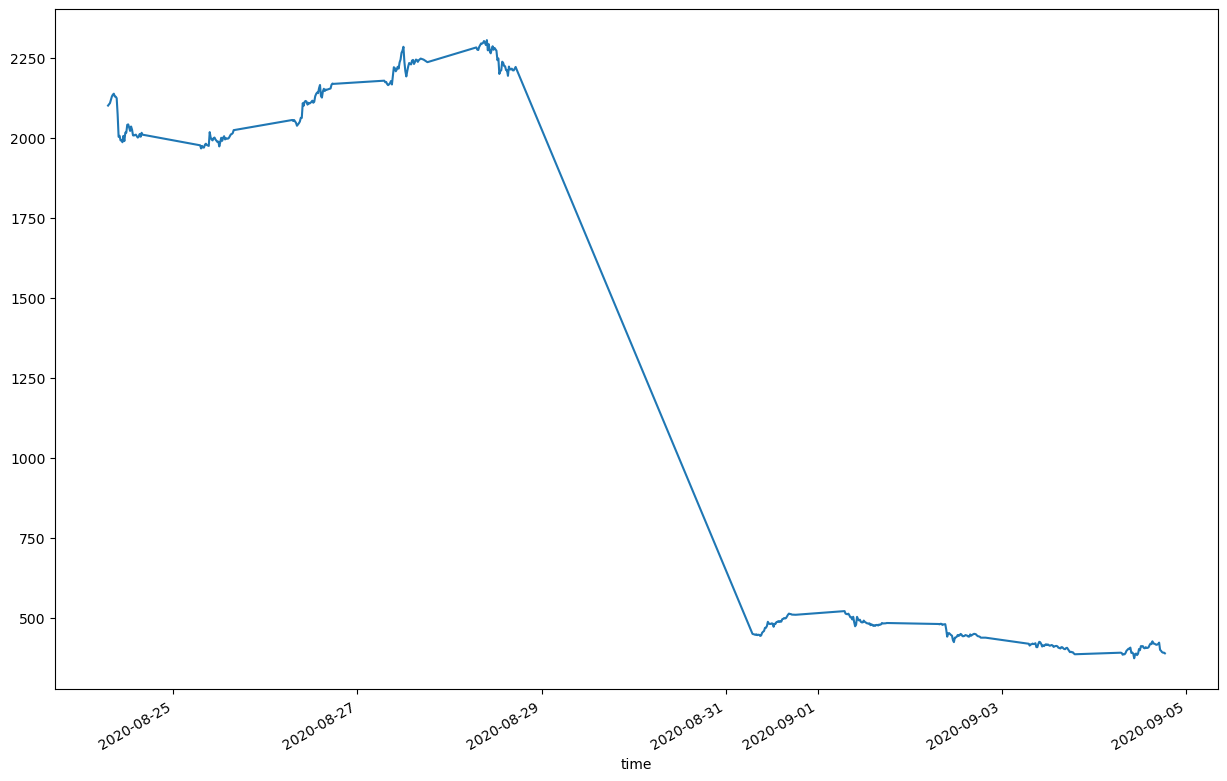

In [31]:
# Select and plot the TSLA closing prices from August 22 to September 5, 2020
df_tsla.loc['2020-08-22':'2020-09-05','close'].plot(figsize=[15,10])